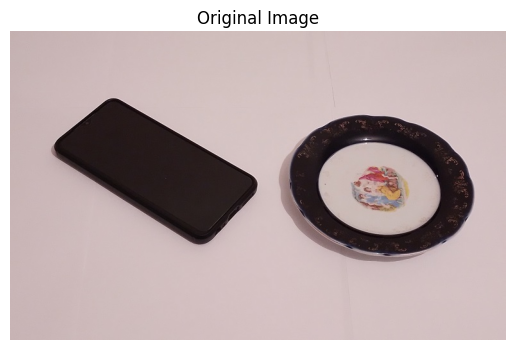

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

results_dir = "Results/Edge_Analysis_Results"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

image_path = "Original_Images/Edge_Analysis/photo_elshan.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()


# Task 1.A - Edges

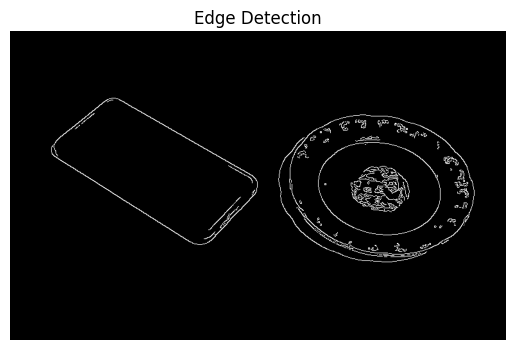

True

In [2]:
edges = cv2.Canny(image, 100, 200)

plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis('off')
plt.show()

cv2.imwrite(os.path.join(results_dir, "photo_elshan_edges.jpg"), edges)

# Task 1.B - Corners

<ipython-input-3-de56cdc5c238>:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


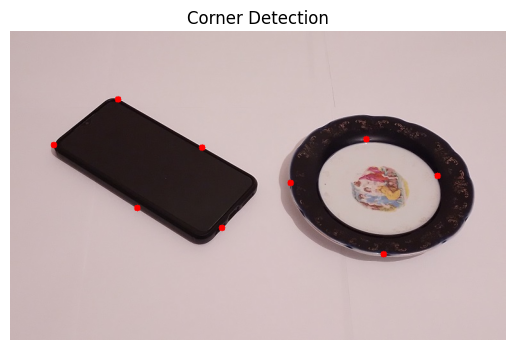

True

In [3]:
def detect_corners(image, max_corners=4, quality_level=0.01, min_distance=10):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, max_corners, quality_level, min_distance)
    corners = np.int0(corners)
    image_with_corners = np.copy(image_rgb)
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(image_with_corners, (x, y), 5, (255, 0, 0), -1)
    plt.imshow(image_with_corners)
    plt.title("Corner Detection")
    plt.axis('off')
    plt.show()
    return image_with_corners

image_with_corners = detect_corners(image, max_corners=10, quality_level=0.001, min_distance=120)
cv2.imwrite(os.path.join(results_dir, "photo_elshan_corners.jpg"), cv2.cvtColor(image_with_corners, cv2.COLOR_RGB2BGR))

# Task 1.C - Lines and Circles(Ellipses)

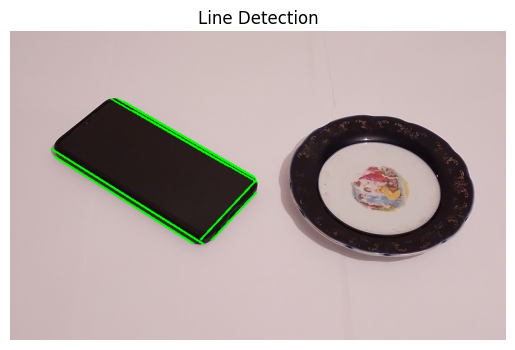

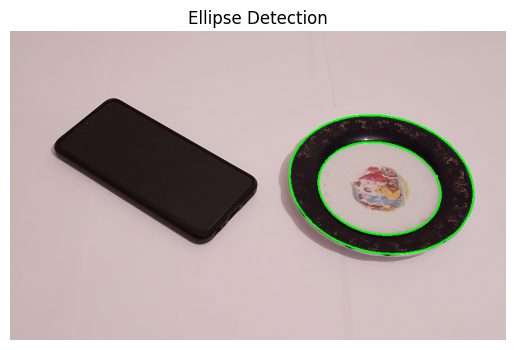

True

In [4]:
# Line Detection
def detect_lines(image, rho=1, theta=np.pi/180, threshold=94, min_line_length=40, max_line_gap=20):
    edges = cv2.Canny(image, 50, 150)
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), minLineLength=min_line_length, maxLineGap=max_line_gap)
    image_with_lines = np.copy(image_rgb)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
    plt.imshow(image_with_lines)
    plt.title("Line Detection")
    plt.axis('off')
    plt.show()
    return image_with_lines

image_with_lines = detect_lines(gray)
cv2.imwrite(os.path.join(results_dir, "photo_elshan_lines.jpg"), cv2.cvtColor(image_with_lines, cv2.COLOR_RGB2BGR))


# Ellipse Detection
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(image_gray, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 132]
ellipses = [cv2.fitEllipse(cnt) for cnt in contours if len(cnt) >= 5]

image_with_ellipses = image_rgb.copy()

for ellipse in ellipses:
    aspect_ratio = max(ellipse[1]) / min(ellipse[1]) if min(ellipse[1]) > 0 else 1
    if aspect_ratio < 1.5 and min(ellipse[1])>80:
        cv2.ellipse(image_with_ellipses, ellipse, (0, 255, 0), 2)

plt.imshow(image_with_ellipses)
plt.title("Ellipse Detection")
plt.axis('off')
plt.show()

ellipse_result_path = os.path.join(results_dir, "photo_elshan_ellipses.jpg")
cv2.imwrite(ellipse_result_path, cv2.cvtColor(image_with_ellipses, cv2.COLOR_RGB2BGR))